In [62]:
import sqlite3
from sqlalchemy import create_engine
import pandas as pd
from glob import glob

wd = '/content/test/example/final'
db = glob(f'{wd}/*.db')[0]

In [64]:
con = sqlite3.connect(db)
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_name = cursor.fetchall()[0][0]

In [65]:
# Create your connection.
engine = create_engine(f'sqlite:///{db}')
with engine.connect() as conn, conn.begin():
    df = pd.read_sql_table(table_name,conn)

In [70]:
df.describe()

accretion    after_ba  after_merch_bdft  after_merch_ft3   after_qmd  \
count  126.000000  126.000000        126.000000       126.000000  126.000000   
mean   116.960317  189.825397      16300.000000      2762.857143    8.296825   
std     61.159909   87.566028       9003.986731      1397.653735    3.368345   
min      0.000000   48.000000        874.000000       321.000000    2.700000   
25%     74.000000  153.000000      11686.000000      2122.000000    6.125000   
50%    122.500000  178.000000      15612.000000      2718.000000    8.250000   
75%    152.750000  227.000000      20037.000000      3227.250000   10.000000   
max    299.000000  456.000000      43953.000000      6945.000000   16.400000   

        after_sdi  after_total_ft3    after_tpa         age     cond  ...  \
count  126.000000       126.000000   126.000000  126.000000    126.0  ...   
mean   368.547619      6627.936508   619.793651   63.000000  31566.0  ...   
std    124.920686      4000.601726   308.675890   30.397368      0.0  ...   
min    146.000000       826.000000   163.000000   13.000000  31566.0  ...   
25%    285.000000      4116.250000   364.250000   38.000000  31566.0  ...   
50%    342.500000      6431.000000   526.500000   63.000000  31566.0  ...   
75%    468.250000      7664.250000   836.000000   88.000000  31566.0  ...   
max    687.000000     19760.000000  1192.000000  113.000000  31566.0  ...   

       merch_carbon_removed  merch_carbon_stored         agl         bgl  \
count            120.000000           120.000000  120.000000  120.000000   
mean               2.693333             1.402500   39.515000   10.124167   
std                3.797428             2.038679   21.191744    5.310525   
min                0.000000             0.000000    7.200000    1.800000   
25%                0.000000             0.000000   27.525000    6.800000   
50%                0.400000             0.100000   38.900000   10.250000   
75%                4.200000             2.450000   44.550000   11.900000   
max               12.600000             6.700000  107.800000   26.800000   

       calc_carbon        dead  total_stand_carbon  econ_removed_merch_bdft  \
count   120.000000  120.000000          120.000000               120.000000   
mean     54.770000    5.130833           77.585000               433.308333   
std      22.622052    6.812813           18.325528              1459.676940   
min      25.400000    0.000000           57.800000                 0.000000   
25%      44.200000    0.500000           68.350000                 0.000000   
50%      50.600000    1.100000           71.100000                 0.000000   
75%      57.000000    7.975000           77.725000                 0.000000   
max     135.100000   25.000000          148.500000             10234.000000   

       econ_removed_merch_ft3  undiscounted_revenue  
count              120.000000                 120.0  
mean                75.483333                   0.0  
std                258.208208                   0.0  
min                  0.000000                   0.0  
25%                  0.000000                   0.0  
50%                  0.000000                   0.0  
75%                  0.000000                   0.0  
max               1813.000000                   0.0  

[8 rows x 76 columns]

In [71]:
import numpy as np

pt_year = pd.pivot_table(df,
    index=['cond', 'rx', 'offset'],
    columns=['year'],
    values=['removed_merch_bdft'],
    aggfunc=[np.sum],  
    margins=True)

pt_year.to_csv("/content/test/example/harvest_by_year.csv")
pt_year.head()

sum                                        \
                removed_merch_bdft                                         
year                          2013  2018 2023 2028  2033 2038  2043 2048   
cond  rx offset                                                            
31566 1  0                       0     0    0    0     0    0     0    0   
      25 0                       0   640    0    0  5624    0     0    0   
         10                      0   640    0    0     0    0  4998    0   
All                              0  1280    0    0  5624    0  4998    0   

                            ...                                                \
                            ...                                                 
year             2053 2058  ...  2073 2078  2083 2088   2093 2098   2103 2108   
cond  rx offset             ...                                                 
31566 1  0          0    0  ...     0    0     0    0      0    0      0    0   
      25 0       3391    0  ...  3371    0     0    0  10978    0      0    0   
         10         0    0  ...     0    0  5028    0      0    0  14129    0   
All              3391    0  ...  3371    0  5028    0  10978    0  14129    0   

                             
                             
year            2113    All  
cond  rx offset              
31566 1  0         0      0  
      25 0         0  24004  
         10        0  28825  
All                0  52829  

[4 rows x 22 columns]

In [72]:
startdf = df.query("year == 2013 and rx == 1")

# same result with alternate syntax using .loc
startdf = df.loc[(df.year == 2013) & (df.rx == 1)]

<AxesSubplot:>

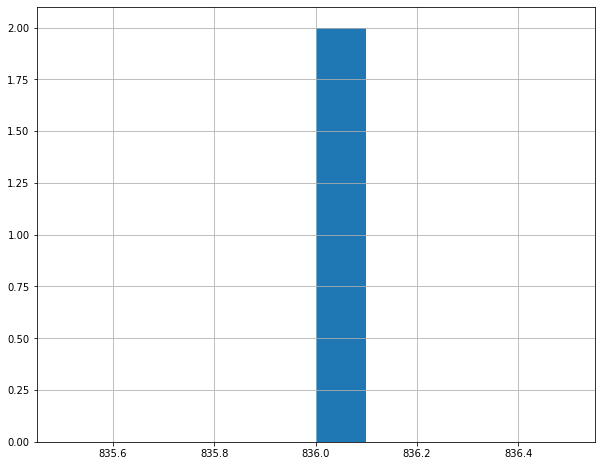

In [73]:
startdf.start_tpa.hist()

In [41]:
conds = df.cond.unique()
conds.sort()
conds

array([31566])

In [49]:
df

accretion  after_ba  after_merch_bdft  after_merch_ft3  after_qmd  \
0          152       227             11686             2122        7.1   
1          157       230             13146             2350        7.5   
2          163       242             14587             2579        8.1   
3          167       254             16176             2823        8.7   
4          169       266             17744             3078        9.4   
..         ...       ...               ...              ...        ...   
121         76       174             20296             3192        8.6   
122         74       181             21528             3363        9.5   
123         66       158             19109             2969       10.4   
124         68       165             20062             3107        7.5   
125          0       171             21122             3251        8.4   

     after_sdi  after_total_ft3  after_tpa  age    climate  ...  \
0          478             6179        836   13  NoClimate  ...   
1          471             6687        741   18  NoClimate  ...   
2          481             7449        671   23  NoClimate  ...   
3          490             8243        609   28  NoClimate  ...   
4          500             9058        555   33  NoClimate  ...   
..         ...              ...        ...  ...        ...  ...   
121        338             7729        430   93  NoClimate  ...   
122        337             8097        365   98  NoClimate  ...   
123        285             7136        266  103  NoClimate  ...   
124        337             7450        532  108  NoClimate  ...   
125        335             7771        442  113  NoClimate  ...   

     merch_carbon_stored   agl   bgl  calc_carbon  dead  total_stand_carbon  \
0                    0.0  38.7  11.9         50.6   0.0                69.3   
1                    0.0  41.7  12.1         55.0   1.2                73.2   
2                    0.0  45.7  12.8         59.5   1.0                77.5   
3                    0.0  49.9  13.6         64.4   0.9                82.0   
4                    0.0  54.2  14.4         69.4   0.8                86.4   
..                   ...   ...   ...          ...   ...                 ...   
121                  5.1  44.7  10.8         55.8   0.3                70.4   
122                  5.0  46.8  11.3         58.3   0.2                72.1   
123                  6.7  41.2  10.0         51.4   0.2                67.9   
124                  6.4  43.1  10.5         53.8   0.2                68.6   
125                  NaN   NaN   NaN          NaN   NaN                 NaN   

     econ_removed_merch_bdft  econ_removed_merch_ft3  undiscounted_revenue  \
0                        0.0                     0.0                   0.0   
1                        0.0                     0.0                   0.0   
2                        0.0                     0.0                   0.0   
3                        0.0                     0.0                   0.0   
4                        0.0                     0.0                   0.0   
..                       ...                     ...                   ...   
121                      0.0                     0.0                   0.0   
122                      0.0                     0.0                   0.0   
123                   3518.0                   547.0                   0.0   
124                      0.0                     0.0                   0.0   
125                      NaN                     NaN                   NaN   

                                        harvest_report  
0                                                 None  
1                                                 None  
2                                                 None  
3                                                 None  
4                                                 None  
..                                                 ...  
121                       

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.lineplot(df.loc[(df.offset == 0)],
           "year", unit="cond", condition="rx", value="after_merch_ft3")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `year` for parameter `y`